<h1> Скачиваем набор данных

In [1]:
!nvidia-smi

Tue Jul  1 15:45:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8             12W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Подготовка данных

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import shutil

Откроем датасет, которые получили после предварительной обработки текстовых данных

In [3]:
# Source directory
source_dir = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized"

# Destination directory
destination_dir = "/kaggle/working/chest-xrays-indiana-university/images/images_normalized"

shutil.copytree(source_dir, destination_dir)

'/kaggle/working/chest-xrays-indiana-university/images/images_normalized'

In [4]:
df = pd.read_csv("/kaggle/input/merged-df-pkl/final.csv")
df.head()

,Frontal,Lateral,MeSH,Problems,indication,findings,impression
0,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,normal,normal,positive tb test,the cardiac silhouette and mediastinum size ar...,normal chest
1,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,preop bariatric surgery,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings
2,3_IM-1384-1001.dcm.png,3_IM-1384-2001.dcm.png,normal,normal,rib pain after a steps this pain to r back r e...,NaN,no displaced rib fractures pneumothora or pleu...
3,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...",with,there are diffuse bilateral interstitial and a...,bullous emphysema and interstitial fibrosis p...
4,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,chest and nasal congestion,the cardiomediastinal silhouette and pulmonary...,no acute cardiopulmonary abnormality


In [5]:
df = df[["Frontal", "Lateral", "findings"]]
df = df.rename(columns={"Frontal": "image_1",
                        "Lateral": "image_2"
                        })

In [6]:
df.head()

,image_1,image_2,findings
0,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,the cardiac silhouette and mediastinum size ar...
1,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,borderline cardiomegaly midline sternotomy enl...
2,3_IM-1384-1001.dcm.png,3_IM-1384-2001.dcm.png,NaN
3,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,there are diffuse bilateral interstitial and a...
4,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,the cardiomediastinal silhouette and pulmonary...


In [7]:
df.shape

(3913, 3)

Проверим на пустоты

In [8]:
df.isnull().sum()

image_1       0
image_2       0
findings    525
dtype: int64

In [9]:
df.dropna(inplace=True)

## Подготовим текст

In [10]:
df_1 = df.copy()

Добавим `<start>` & `<end>`

In [11]:
df_1["findings"] = "<start> " + df_1["findings"] + " <end>"

In [12]:
df_1.head()

,image_1,image_2,findings
0,1_IM-0001-4001.dcm.png,1_IM-0001-3001.dcm.png,<start> the cardiac silhouette and mediastinum...
1,2_IM-0652-1001.dcm.png,2_IM-0652-2001.dcm.png,<start> borderline cardiomegaly midline sterno...
3,4_IM-2050-1001.dcm.png,4_IM-2050-2001.dcm.png,<start> there are diffuse bilateral interstiti...
4,5_IM-2117-1003002.dcm.png,5_IM-2117-1004003.dcm.png,<start> the cardiomediastinal silhouette and p...
5,6_IM-2192-1001.dcm.png,6_IM-2192-2001.dcm.png,<start> heart size and mediastinal contour are...


Для изображений укажем путь

In [13]:
df_1["image_1"] = "/kaggle/working/chest-xrays-indiana-university/images/images_normalized/" + df_1["image_1"]
df_1["image_2"] = "/kaggle/working/chest-xrays-indiana-university/images/images_normalized/" + df_1["image_2"]

df_1.head()

,image_1,image_2,findings
0,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> the cardiac silhouette and mediastinum...
1,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> borderline cardiomegaly midline sterno...
3,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> there are diffuse bilateral interstiti...
4,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> the cardiomediastinal silhouette and p...
5,/kaggle/working/chest-xrays-indiana-university...,/kaggle/working/chest-xrays-indiana-university...,<start> heart size and mediastinal contour are...


Запишем данные из таблицы в списки

In [14]:
# med_report = []
# image_paths = []

# for i in tqdm(range (0,df.shape [0])):
#     image_paths.append(df_1.iloc[i].loc['image_1'])
#     med_report.append(df_1.iloc[i].loc['findings'])
#     image_paths.append(df_1.iloc[i].loc['image_2'])
#     med_report.append(df_1.iloc[i].loc['findings'])

    
image_path_pairs = []
med_reports = []
df_1_reset = df_1.reset_index(drop=True) # Сбрасываем индекс для корректной итерации

for i in tqdm(range(len(df_1_reset))):
    # Создаем кортеж (пара) из путей к фронтальному и латеральному изображениям
    frontal_path = df_1_reset.iloc[i].loc['image_1']
    lateral_path = df_1_reset.iloc[i].loc['image_2']
    image_path_pairs.append((frontal_path, lateral_path))
    
    # Добавляем соответствующий отчет
    med_reports.append(df_1_reset.iloc[i].loc['findings'])

# Проверим результат
print(f"Количество пар изображений: {len(image_path_pairs)}")
print(f"Количество отчетов: {len(med_reports)}")
print("Пример пары путей:", image_path_pairs[0])

  0%|          | 0/3388 [00:00<?, ?it/s]

Количество пар изображений: 3388
Количество отчетов: 3388
Пример пары путей: ('/kaggle/working/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-4001.dcm.png', '/kaggle/working/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-3001.dcm.png')


Создание списка подписей

In [15]:
train_captions = []
train_captions = med_reports

# Создание модели

Используется механизм внимания с *энкодером* и *декодером*.

**Энкодер** пропускает признаки изображения через полносвязный слой. **Декодер** генерирует подписи к этим признакам.

Вместо того чтобы обучать модель с нуля, мы использовали DenseNet121 с предварительно обученными весами [CheXNet](https://www.kaggle.com/datasets/theewok/chexnet-keras-weights)

In [16]:
import tensorflow as tf

2025-07-01 15:49:15.921328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751384956.079398      73 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751384956.126168      73 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
CHEXNET_WEIGHTS = """/kaggle/input/chexnet-weights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5"""

___

<h1> Подготовка модели

In [20]:
# Шаг 1: Загружаем ПОЛНУЮ модель DenseNet121, так как веса CheXNet предназначены для неё.
# include_top=True гарантирует, что количество слоев будет совпадать с файлом весов.
full_chexnet_model = tf.keras.applications.densenet.DenseNet121(
    include_top=True,
    weights=CHEXNET_WEIGHTS, # Теперь загрузка весов пройдет успешно
    input_shape=(299, 299, 3),
    classes=14 # Указываем количество классов, как в CheXNet
)

# Шаг 2: Теперь, когда веса загружены, мы можем "отрезать" ненужные слои, чтобы получить карту признаков.
# Мы возьмем выход слоя перед GlobalAveragePooling2D. В стандартной архитектуре DenseNet121 это слой с именем 'relu'.
# Давайте найдем его имя, чтобы сделать код надежнее.
# full_chexnet_model.summary() # Можете раскомментировать, чтобы увидеть все имена слоев

# Слой, который нам нужен, находится перед 'avg_pool' (GlobalAveragePooling2D)
feature_map_output = full_chexnet_model.get_layer('relu').output 
new_input = full_chexnet_model.input

# Шаг 3: Создаем новую модель, которая будет нашим извлекателем признаков.
# Она будет иметь те же входы и веса, что и полная модель, но другой выход.
image_features_extract_model = tf.keras.Model(inputs=new_input, outputs=feature_map_output)

# Давайте снова проверим форму выхода, чтобы убедиться, что все правильно.
test_input = tf.random.uniform((1, 299, 299, 3))
test_output = image_features_extract_model(test_input)
print(f"Форма выхода из image_features_extract_model: {test_output.shape}")
# Ожидаемый вывод: (1, 9, 9, 1024) или что-то очень похожее, например (1, 9, 9, 1024)

Форма выхода из image_features_extract_model: (1, 9, 9, 1024)


# Функция загрузки изображения

In [21]:
def load_image(image_path):
    # 1) Читаем файл и декодируем JPEG в uint8
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)

    # 2) Изменяем размер (по-прежнему uint8)
    img = tf.keras.layers.Resizing(299, 299)(img)

    # 3) Кастим в float32, чтобы preprocess_input сработал корректно
    img = tf.cast(img, tf.float32)

    # 4) Нормализуем под InceptionV3: (0–255) → (–1 … +1)
    img = tf.keras.applications.densenet.preprocess_input(img)

    return img, image_path

# Извлечение и сохранение объединенных признаков

In [22]:
# Получаем уникальные пары путей
encode_train_pairs = sorted(list(set(image_path_pairs)))

print(f"Извлекаем признаки из {len(encode_train_pairs)} уникальных пар изображений.")

for img_path_1, img_path_2 in tqdm(encode_train_pairs):
    # Загружаем и извлекаем признаки для первого изображения
    # load_image возвращает img, path. Нам нужен только img [0]
    img_tensor_1 = tf.expand_dims(load_image(img_path_1)[0], 0)
    features_1 = image_features_extract_model(img_tensor_1)

    # Загружаем и извлекаем признаки для второго изображения
    img_tensor_2 = tf.expand_dims(load_image(img_path_2)[0], 0)
    features_2 = image_features_extract_model(img_tensor_2)
    
    # ИЗМЕНЕНИЕ: Reshape признаков перед конкатенацией
    # Форма features_1: (1, 9, 9, 1024). Нужно -> (1, 81, 1024)
    features_1_reshaped = tf.reshape(features_1, (features_1.shape[0], -1, features_1.shape[3]))
    features_2_reshaped = tf.reshape(features_2, (features_2.shape[0], -1, features_2.shape[3]))
    
    # Объединяем (конкатенируем) признаки.
    # Это ключевой момент: мы "склеиваем" информацию от двух изображений.
    # Форма каждого: (1, 81, 1024). После конкатенации по последней оси: (1, 81, 2048)
    combined_features = tf.concat([features_1_reshaped, features_2_reshaped], axis=-1)

    # Приводим к нужной форме для сохранения (убираем измерение батча)
    combined_features_final = tf.reshape(combined_features, (combined_features.shape[1], combined_features.shape[2]))

    # Сохраняем объединенные признаки. Используем путь к фронтальному снимку как ключ.
    path_of_feature = img_path_1
    np.save(path_of_feature, combined_features_final.numpy())

Извлекаем признаки из 3388 уникальных пар изображений.


  0%|          | 0/3388 [00:00<?, ?it/s]

# Токенизация и создание выборок

Токенизация текста

In [23]:
caption_dataset = tf.data.Dataset.from_tensor_slices(train_captions)

max_length = 100
vocabulary_size = 9000

tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=max_length
)

tokenizer.adapt(caption_dataset)

Векторизация полей

In [24]:
cap_vector = caption_dataset.map(lambda x: tokenizer(x))

Создание словарей

In [25]:
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())

index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

Разделение данных на train & test выборки

In [26]:
import collections
import random

In [27]:
img_to_cap_vector = collections.defaultdict(list)
# Ключом является кортеж из двух путей
for img_pair, cap in zip(image_path_pairs, cap_vector):
    img_to_cap_vector[img_pair].append(cap)

# Создаем обучающую и валидационную выборки
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys) * 0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

# Для обучающей выборки
img_name_train = []
cap_train = []
for imgt_pair in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt_pair])
    img_name_train.extend([imgt_pair] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt_pair])

# Для валидационной выборки
img_name_val = []
cap_val = []
for imgv_pair in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv_pair])
    img_name_val.extend([imgv_pair] * capv_len)
    cap_val.extend(img_to_cap_vector[imgv_pair])

In [28]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(2710, 2710, 678, 678)

# Создание конвейера данных tf.data

In [29]:
batch_size = 64
buffer_size = 1000
embedding_dim = 512
units = 1024
num_steps = len(img_name_train) // batch_size
# ИЗМЕНЕНО: теперь у нас 2048 признаков (1024 + 1024)
features_shape = 2048 
# ИЗМЕНЕНО: теперь у нас 81 вектор в последовательности (9*9)
attention_features_shape = 81

Загрузка numpy файлов

In [30]:
def map_func(img_name_1, cap):
    # Загружаем объединенные признаки по имени первого (фронтального) файла
    img_tensor = np.load(img_name_1.decode('utf-8') + '.npy')
    return img_tensor, cap

In [31]:
# Разделяем пары путей на два отдельных списка
img1_train_paths, _ = zip(*img_name_train) # Второй список нам не нужен

# Создаем датасет. Передаем только путь к первому изображению, т.к. по нему сохранен .npy
dataset = tf.data.Dataset.from_tensor_slices((list(img1_train_paths), cap_train))

# Используем map для загрузки .npy файлов
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int64]),
          num_parallel_calls=tf.data.AUTOTUNE)

# Перемешивание и батчинг
dataset = dataset.shuffle(buffer_size).batch(batch_size)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

<h1> Создание модели

In [123]:
class CustomAttention(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super().__init__(**kwargs)
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)))
        score = self.V(attention_hidden_layer)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

In [124]:
class CNN_Encoder(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, **kwargs):
        super().__init__(**kwargs)
        self.fc = tf.keras.layers.Dense(embedding_dim, activation='relu')

    def call(self, x):
        return self.fc(x)

In [125]:
class RNN_Decoder(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, units, vocab_size, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units,
                                     return_sequences=True,
                                     return_state=True,
                                     recurrent_initializer='glorot_uniform')
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)
        self.attention = CustomAttention(self.units)

    def call(self, x, features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.gru(x, initial_state=hidden)
        x = self.fc1(output)
        x = tf.reshape(x, (-1, x.shape[2]))
        x = self.fc2(x)
        return x, state, attention_weights
        
    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [142]:
class ImageCaptioningModel(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        # Добавьте другие метрики, если нужно, например, self.accuracy_tracker
    
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        img_tensor, target = data
        
        loss = tf.constant(0.0)
        
        # 1. Получаем размер батча динамически
        batch_size = tf.shape(target)[0]
        
        # 2. Используем его для сброса состояния
        hidden = self.decoder.reset_state(batch_size=batch_size)
        
        # 3. ИСПОЛЬЗУЕМ ЕГО ЖЕ для создания начального входа
        dec_input = tf.expand_dims([word_to_index('<start>')] * batch_size, 1)

        with tf.GradientTape() as tape:
            features = self.encoder(img_tensor)

            for i in range(1, target.shape[1]):
                predictions, hidden, _ = self.decoder(dec_input, features, hidden)
                
                mask = tf.math.logical_not(tf.math.equal(target[:, i], 0))
                step_loss = loss_object(target[:, i], predictions)
                mask = tf.cast(mask, dtype=step_loss.dtype)
                step_loss *= mask
                
                loss += tf.reduce_sum(step_loss)
                
                # Teacher forcing
                dec_input = tf.expand_dims(target[:, i], 1)

        # Используем tf.cast, чтобы избежать проблем с типами
        num_tokens = tf.cast(tf.reduce_sum(tf.cast(target != 0, tf.int32)), tf.float32)
        total_loss = tf.math.divide_no_nan(loss, num_tokens)

        trainable_vars = self.encoder.trainable_variables + self.decoder.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(trainable_vars, gradients))
        
        self.loss_tracker.update_state(total_loss)

        return {"loss": self.loss_tracker.result()}

In [143]:
# 1. Создаем экземпляры энкодера и декодера
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, tokenizer.vocabulary_size())

# 2. Создаем экземпляр нашей главной модели
captioning_model = ImageCaptioningModel(encoder=encoder, decoder=decoder)

# 3. Компилируем модель, указывая оптимизатор
captioning_model.compile(
    optimizer=tf.keras.optimizers.Adam()
)

# 4. (Опционально) Восстанавливаем чекпоинт, если он есть
# checkpoint_path = "/kaggle/working/"
# ckpt = tf.train.Checkpoint(model=captioning_model, optimizer=captioning_model.optimizer)
# ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
# if ckpt_manager.latest_checkpoint:
#     ckpt.restore(ckpt_manager.latest_checkpoint)
#     print("Восстановлен последний чекпоинт.")

# 5. Создаем колбэк для сохранения модели
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/kaggle/working/checkpoints/train/.weights.h5",
    save_weights_only=True,
    save_best_only=True,
    monitor='loss',
    mode='min',
    verbose=1
)

In [144]:
# optimizer = tf.keras.optimizers.Adam()
# loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
#                                                             reduction='none')

In [145]:
# def loss_function(real, pred):
#     mask = tf.math.logical_not(tf.math.equal(real, 0))
#     loss_ = loss_object(real, pred)

#     mask = tf.cast(mask, dtype=loss_.dtype)
#     loss_ *= mask

#     return tf.reduce_mean(loss_)

In [146]:
# checkpoint_path = "/kaggle/working/"

# ckpt = tf.train.Checkpoint(encoder=encoder,
#                            decoder=decoder,
#                            optimizer=optimizer)

# ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [147]:
# start_epoch = 0
# if ckpt_manager.latest_checkpoint:
#     start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
#     ckpt.restore(ckpt_manager.latest_checkpoint)

<h2> Обучение

In [148]:
# loss_plot = []

In [149]:
# @tf.function # Возвращаем декоратор для скорости!
# def train_step(img_tensor, target):
#     loss = 0
#     hidden = decoder.reset_state(batch_size=target.shape[0])
#     dec_input = tf.expand_dims([word_to_index('<start>')] * target.shape[0], 1)

#     with tf.GradientTape() as tape:
#         features = encoder(img_tensor)

#         for i in range(1, target.shape[1]):
#             # ИСПРАВЛЕНО: Распаковываем в 3 переменные, игнорируя последнюю
#             predictions, hidden, _ = decoder(dec_input, features, hidden)
            
#             loss += loss_function(target[:, i], predictions)
            
#             dec_input = tf.expand_dims(target[:, i], 1)

#     total_loss = (loss / int(target.shape[1]))
    
#     trainable_variables = encoder.trainable_variables + decoder.trainable_variables
#     gradients = tape.gradient(loss, trainable_variables)
#     optimizer.apply_gradients(zip(gradients, trainable_variables))

#     return loss, total_loss

<h3>5 эпох

In [150]:
import time
import matplotlib.pyplot as plt

In [151]:
EPOCHS = 5

history = captioning_model.fit(
    dataset,
    epochs=EPOCHS,
    callbacks=[checkpoint_callback]
)

# Теперь можно построить график потерь из объекта history
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Epoch 1/5


ValueError: as_list() is not defined on an unknown TensorShape.

In [ ]:
# EPOCHS = 5

# for epoch in range(start_epoch, EPOCHS):
#     start = time.time()
#     total_loss = 0

#     for (batch, (img_tensor, target)) in enumerate(dataset):
#         batch_loss, t_loss = train_step(img_tensor, target)
#         total_loss += t_loss

#         if batch % 100 == 0:
#             average_batch_loss = batch_loss.numpy() / int(target.shape[1])
#             print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')

#     # storing the epoch end loss value to plot later
#     loss_plot.append(total_loss / num_steps)

#     if epoch % 5 == 0:
#       ckpt_manager.save()

#     print(f'Epoch {epoch+1} Loss {total_loss / num_steps:.6f}')
#     print(f'Time taken for 1 epoch {time.time() - start:.2f} sec\n')

OperatorNotAllowedInGraphError: in user code:

    File "/tmp/ipykernel_73/3788556810.py", line 12, in train_step  *
        predictions, hidden, _ = decoder(dec_input, features, hidden)
    File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/ipykernel_73/1157247805.py", line 20, in call
        output, state = self.gru(x, initial_state=hidden)

    OperatorNotAllowedInGraphError: Exception encountered when calling GRU.call().
    
    [1mIterating over a symbolic `tf.Tensor` is not allowed. You can attempt the following resolutions to the problem: If you are running in Graph mode, use Eager execution mode or decorate this function with @tf.function. If you are using AutoGraph, you can try decorating this function with @tf.function. If that does not work, then you may be using an unsupported feature or your source code may not be visible to AutoGraph. See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/limitations.md#access-to-source-code for more information.[0m
    
    Arguments received by GRU.call():
      • sequences=tf.Tensor(shape=(64, 1, 1024), dtype=float32)
      • initial_state=tf.Tensor(shape=(64, 1024), dtype=float32)
      • mask=None
      • training=False


Графики после 5 эпох обучения

In [46]:
import matplotlib.pyplot as plt

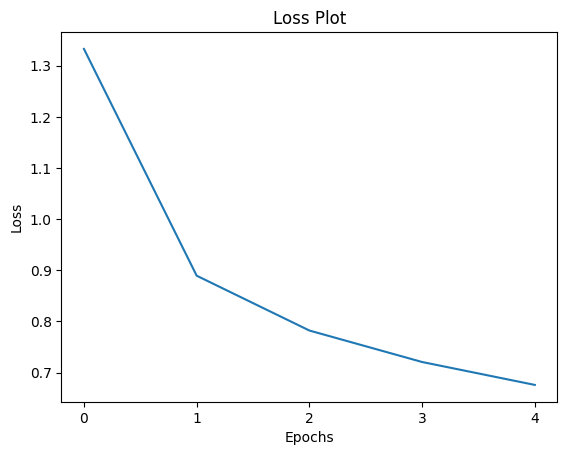

In [47]:
plt.plot(loss_plot)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.xticks(range(0, len(loss_plot)))
plt.show()

<h3> Добавим еще 10 эпох. Итого 15

In [ ]:
EPOCHS = 10

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy() / int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss / num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec\n')

Epoch 1 Batch 0 Loss 0.9689
Epoch 1 Loss 1.011111
Time taken for 1 epoch 67.57 sec

Epoch 2 Batch 0 Loss 0.8315
Epoch 2 Loss 0.975857
Time taken for 1 epoch 66.34 sec

Epoch 3 Batch 0 Loss 1.0507
Epoch 3 Loss 0.944577
Time taken for 1 epoch 66.65 sec

Epoch 4 Batch 0 Loss 1.0354
Epoch 4 Loss 0.914249
Time taken for 1 epoch 66.70 sec

Epoch 5 Batch 0 Loss 0.8720
Epoch 5 Loss 0.885747
Time taken for 1 epoch 66.77 sec

Epoch 6 Batch 0 Loss 0.9010
Epoch 6 Loss 0.862243
Time taken for 1 epoch 67.87 sec

Epoch 7 Batch 0 Loss 0.8399
Epoch 7 Loss 0.839046
Time taken for 1 epoch 66.80 sec

Epoch 8 Batch 0 Loss 0.8168
Epoch 8 Loss 0.814183
Time taken for 1 epoch 66.75 sec

Epoch 9 Batch 0 Loss 0.7715
Epoch 9 Loss 0.785966
Time taken for 1 epoch 66.76 sec

Epoch 10 Batch 0 Loss 0.7649
Epoch 10 Loss 0.761603
Time taken for 1 epoch 66.75 sec



Графики после 15 эпох обучения

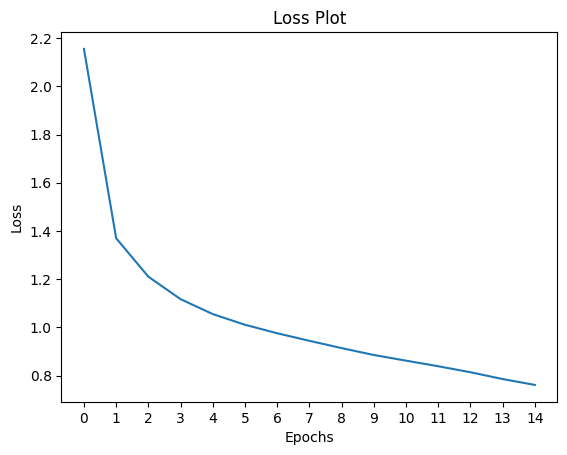

In [ ]:
plt.plot(loss_plot)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.xticks(range(0, len(loss_plot)))
plt.show()

In [ ]:
EPOCHS = 5

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy() / int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')

    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
      ckpt_manager.save()

    print(f'Epoch {epoch+1} Loss {total_loss / num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec\n')

Epoch 1 Batch 0 Loss 0.5332
Epoch 1 Loss 0.736289
Time taken for 1 epoch 67.37 sec

Epoch 2 Batch 0 Loss 0.7078
Epoch 2 Loss 0.711369
Time taken for 1 epoch 66.84 sec

Epoch 3 Batch 0 Loss 0.6371
Epoch 3 Loss 0.682435
Time taken for 1 epoch 66.66 sec

Epoch 4 Batch 0 Loss 0.6375
Epoch 4 Loss 0.653963
Time taken for 1 epoch 67.11 sec

Epoch 5 Batch 0 Loss 0.4836
Epoch 5 Loss 0.625232
Time taken for 1 epoch 67.16 sec



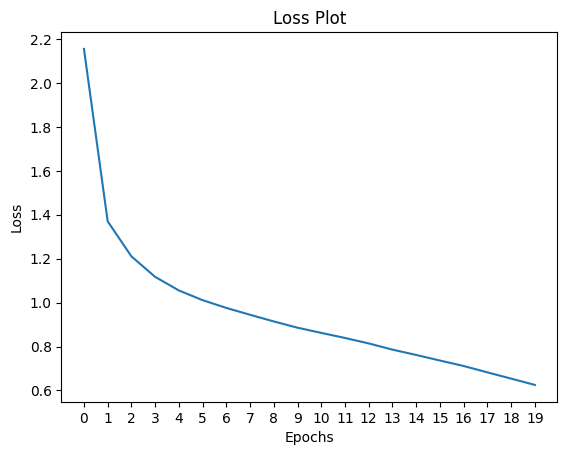

In [ ]:
plt.plot(loss_plot)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.xticks(range(0, len(loss_plot)))
plt.show()

<h2> Подпись

In [53]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([word_to_index('')], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        predicted_word = tf.compat.as_text(index_to_word(predicted_id).numpy())
        result.append(predicted_word)

        if predicted_word == '':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [54]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(200, 200))

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (80, 80))
        grid_size = max(int(np.ceil(len_result/2)), 1)
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    # plt.tight_layout()
    plt.show()

In [50]:
!pip install rouge-score bert-score -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:01:02mm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00:00:0100:01


In [51]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score

chencherry = SmoothingFunction()

rid 380
BLEU-1 score: 0.13920633785811495
BLEU-2 score: 0.09512209710892344
BLEU-3 score: 0.062624920493202
BLEU-4 score: 0.03809385738449338
ROUGE-1 score: 0.7352941176470589
ROUGE-L score: 0.47058823529411764
Real report:  the heart size and mediastinal contours appear within normal limits there are streaky left basilar opacities and blunting of the left costophrenic sulcus secondary to a small effusion no pneumothora no acute bony abnormalities
Predicted report:  heart size within normal limits lungs are clear bilaterally no focal airspace disease pleural effusion or pneumothora there is throughout cardiac and mediastinal contours are within normal limits the aorta is similar to low lung volumes no edema pneumothora pneumothora or pleural effusion within normal limits atelectasis overlying this measures approimately cm in the thoracic spine degenerative changes inflammatoryinfectious process with some scarring in the left midlung no pleural effusion or pneumothora mild degenerative 

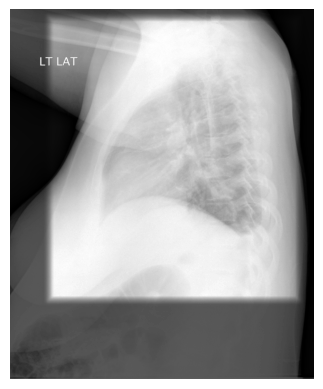

In [57]:
# rid = np.random.randint(0, len(img_name_val))
rid = 380
print('rid', rid)

image = img_name_val[rid]
img = plt.imread(image)

plt.figure()
plt.imshow(img, cmap = "gray")
plt.axis(False)

real_caption = [tf.compat.as_text(index_to_word(i).numpy())
                         for i in cap_val[rid] if i not in [0]]

result, attention_plot = evaluate(image)
rem = ['startseq', 'start', 'end', 'endseq']

real_caption  = [x for x in real_caption if x not in rem]
result = [x for x in result if x not in rem]

weights = [(1, 0, 0, 0),   # BLEU-1
           (0.5, 0.5, 0, 0), # BLEU-2
           (0.33, 0.33, 0.33, 0), # BLEU-3
           (0.25, 0.25, 0.25, 0.25)] # BLEU-4

bleu_scores = []
for weight in weights:
    bl = sentence_bleu([result], real_caption, weights=weight, smoothing_function=SmoothingFunction().method5)
    bleu_scores.append(bl)

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
rouge_scores = scorer.score(' '.join(result), ' '.join(real_caption))

for i, score in enumerate(bleu_scores, start=1):
    print(f"BLEU-{i} score:", score)
print("ROUGE-1 score:", rouge_scores['rouge1'].precision)
print("ROUGE-L score:", rouge_scores['rougeL'].precision)
print('Real report: ', ' '.join([i for i in real_caption]))
print('Predicted report: ', ' '.join(result))


<h2>Расчет качества модели

In [ ]:
# BLEU 1-4

index = len(img_name_val)
cols = ['image', 'real', 'pred', 'bleu_1', 'bleu_2', 'bleu_3', 'bleu_4', 'rouge_1', 'rouge_l']
dat = pd.DataFrame(columns=cols)

# Инициализируем переменные для суммирования метрик
bleu_scores = [0] * len(weights)

# Создаем список весов для BLEU-1 до BLEU-4
weights = [
    (1, 0, 0, 0),    # BLEU-1
    (0.5, 0.5, 0, 0),  # BLEU-2
    (0.33, 0.33, 0.33, 0),  # BLEU-3
    (0.25, 0.25, 0.25, 0.25)  # BLEU-4
]

rouge_1 = 0
rouge_l = 0
bleu_1_scores = []
bleu_2_scores = []
bleu_3_scores = []
bleu_4_scores = []

nums = 50

dfs = []

for j in range(nums):
    image = img_name_val[j]

    real_caption = [tf.compat.as_text(index_to_word(i).numpy())
                            for i in cap_val[j] if i not in [0]]

    result, attention_plot = evaluate(image)

    # removing the start and end tags we initially added
    rem = ['startseq', 'start', 'end', 'endseq']

    real_caption  = [x for x in real_caption if x not in rem]
    result  = [x for x in result if x not in rem]

    print(f'Real report: {" ".join([i for i in real_caption])}')
    print(f'Predicted report: {" ".join(result)}')

    chencherry = SmoothingFunction()
    bleu_scores = [0] * len(weights)

    for i, weight in enumerate(weights):
        bleu_scores[i] = sentence_bleu([result], real_caption, weights=weight,
                                       smoothing_function=chencherry.method5)
    bleu_1_scores.append(bleu_scores[0])
    bleu_2_scores.append(bleu_scores[1])
    bleu_3_scores.append(bleu_scores[2])
    bleu_4_scores.append(bleu_scores[3])

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge_scores = scorer.score(' '.join(result), ' '.join(real_caption))
    rouge_1 += rouge_scores['rouge1'].precision
    rouge_l += rouge_scores['rougeL'].precision

    real_cap =  ' '.join([i for i in real_caption])
    pred_cap = ' '.join(result)

    temp_df = pd.DataFrame({'image': [image],
                            'real': [real_cap],
                            'pred': [pred_cap],
                            'bleu_1': [bleu_scores[0]],
                            'bleu_2': [bleu_scores[1]],
                            'bleu_3': [bleu_scores[2]],
                            'bleu_4': [bleu_scores[3]],
                            'rouge_1': [rouge_scores['rouge1'].precision],
                            'rouge_l': [rouge_scores['rougeL'].precision]})

    dfs.append(temp_df)

    print('BLEU_1 score:', bleu_scores[0])
    print('BLEU_2 score:', bleu_scores[1])
    print('BLEU_3 score:', bleu_scores[2])
    print('BLEU_4 score:', bleu_scores[3])
    print("ROUGE-1 score:", rouge_scores['rouge1'].precision)
    print("ROUGE-L score:", rouge_scores['rougeL'].precision)

    print(f"{'*' * 100}")

average_bleu_1 = sum(bleu_1_scores) / nums
average_bleu_2 = sum(bleu_2_scores) / nums
average_bleu_3 = sum(bleu_3_scores) / nums
average_bleu_4 = sum(bleu_4_scores) / nums

# Вывод средних значений метрик BLEU
print(f"Average BLEU-1 score on the test data is {average_bleu_1}")
print(f"Average BLEU-2 score on the test data is {average_bleu_2}")
print(f"Average BLEU-3 score on the test data is {average_bleu_3}")
print(f"Average BLEU-4 score on the test data is {average_bleu_4}")
print(f"Average rouge_1 score on the test data is {rouge_1 / nums}")
print(f"Average rouge_l score on the test data is {rouge_l / nums}")

dat = pd.concat(dfs, ignore_index=True)

# Сохраняем DataFrame в файл CSV
dat.to_csv('/content/drive/MyDrive/shikha version/data/real_vs_predicted.csv', index=False)

Real report: indications male with pneumonia findings heart size within normal limits there is focal left lateral base airspace disease there is a mm nodular opacity in the right midlung no pneumothora no pleural effusion no displaced rib fractures there is an apparent deformity of the right humeral surgical neck this is not seen on the comparison correlate clinically with history of fracture impressions left base airspace disease and nodular opacity in the right midlung
Predicted report: indications syncopal episode findings the trachea is midline negative for pneumothora pleural effusion or focal airspace consolidation heart size and pulmonary vascularity are within normal limits impressions no acute cardiopulmonary abnormality of lung cancer no months findings the heart size and mediastinal contour are within normal limits the lungs are clear impressions negative for adenopathy no acute osseous abnormality bilateral pulmonary arteries changes of retained contrast at hours findings h

In [ ]:
# index = len(img_name_val)
# cols = ['image', 'real', 'pred', 'bleu', 'rouge_1', 'rouge_l']
# dat = pd.DataFrame(columns=cols)

# bl = 0
# rouge_1 = 0
# rouge_l = 0

# df_predicted_res = pd.DataFrame()

# nums = 50

# for j in range(nums):
#     image = img_name_val[j]

#     real_caption = [tf.compat.as_text(index_to_word(i).numpy())
#                             for i in cap_val[j] if i not in [0]]

#     result, attention_plot = evaluate(image)

#     # removing the start and end tags we initially added
#     rem = ['startseq', 'start', 'end', 'endseq']

#     real_caption  = [x for x in real_caption if x not in rem]
#     result  = [x for x in result if x not in rem]

#     print('Real report: ', ' '.join([i for i in real_caption]))
#     print('Predicted report: ', ' '.join(result))

#     chencherry = SmoothingFunction()
#     bl += sentence_bleu([result], real_caption, weights=(1, 0, 0, 0), smoothing_function=chencherry.method5)
#     scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
#     rouge_scores = scorer.score(' '.join(result), ' '.join(real_caption))
#     rouge_1 += rouge_scores['rouge1'].precision
#     rouge_l += rouge_scores['rougeL'].precision

#     print('Bleu score: ', sentence_bleu([result], real_caption, weights=(1, 0, 0, 0), smoothing_function=chencherry.method5))
#     print("ROUGE-1 score:", rouge_scores['rouge1'].precision)
#     print("ROUGE-L score:", rouge_scores['rougeL'].precision)

#     real_cap =  ' '.join([i for i in real_caption])
#     pred_cap = ' '.join(result)
#     dat = dat.append({'image': image,
#                       'real': real_cap,
#                       'pred': pred_cap,
#                       'bleu': sentence_bleu([result], real_caption, weights=(1, 0, 0, 0), smoothing_function=chencherry.method5),
#                       'rouge_1': rouge_scores['rouge1'].precision,
#                       'rouge_l': rouge_scores['rougeL'].precision}, ignore_index=True)
#     print('*' * 100)

# print("Average bleu score on the test data is ", bl / nums)
# print("Average rouge_1 score on the test data is ", rouge_1 / nums)
# print("Average rouge_l score on the test data is ", rouge_l / nums)

# dat.to_csv('/content/drive/MyDrive/shikha version/data/real_vs_predicted.csv')


In [ ]:
prediction = pd.read_csv('/content/drive/MyDrive/shikha version/data/real_vs_predicted.csv')
prediction

,image,real,pred,bleu_1,bleu_2,bleu_3,bleu_4,rouge_1,rouge_l
0,/content/images/images_normalized/1855_IM-0555...,indications male with pneumonia findings heart...,indications syncopal episode findings the trac...,0.490277,0.305438,0.190763,0.112036,0.356164,0.191781
1,/content/images/images_normalized/119_IM-0128-...,indications right arm numbness rightsided ches...,indications female with and smoking and findin...,0.358128,0.223685,0.140825,0.083065,0.383333,0.233333
2,/content/images/images_normalized/2417_IM-0961...,indications chest pain findings stable cardiom...,indications male with chest pain nonproductive...,0.104533,0.066191,0.039963,0.023106,0.419355,0.387097
3,/content/images/images_normalized/443_IM-2078-...,indications positive ppd findings heart size a...,indications loss of transmetatarsal carcinoma ...,0.217261,0.153326,0.109578,0.076143,0.567568,0.324324
4,/content/images/images_normalized/1210_IM-0142...,indications with scheduled hip replacement sur...,indications findings the lungs remain clear de...,0.505940,0.346912,0.236824,0.153672,0.430769,0.230769
5,/content/images/images_normalized/357_IM-1753-...,indications woman with shortness of breath fin...,indications chest pain findings cardiac and me...,0.547278,0.358324,0.241112,0.155734,0.302632,0.223684
6,/content/images/images_normalized/2702_IM-1170...,indications difficulty breathing chest pain fo...,indications pain findings lungs are mildly inc...,0.132282,0.078423,0.046379,0.026490,0.466667,0.333333
7,/content/images/images_normalized/113_IM-0086-...,indications chest pain findings the heart and ...,indications female with chest pain findings ca...,0.307583,0.192469,0.119218,0.069756,0.375000,0.250000
8,/content/images/images_normalized/36_IM-1776-1...,indications female with chest pain rule out pn...,indications diminished breath sounds findings ...,0.319062,0.217502,0.154605,0.108592,0.568182,0.454545
9,/content/images/images_normalized/738_IM-2296-...,indications chest pain findings the heart and ...,indications female dyspnea shortness of breath...,0.058008,0.034499,0.020417,0.011672,0.461538,0.307692
